# The Plastic Detectives 

![alt text](4251466594dddfb1f5cbe8d38644e98b.jpg "Title")

Welcome to Bangor University's School of Ocean Sciences! Today you'll be using your computer and your IT skills to think like a detective and solve an environmental crime... the dumping of plastic litter in the ocean! 

**The brief** 

A fisherman has reported seeing a high concentration of plastic litter just off the coast of Anglesey to the council. The council has asked you, as part of Bangor University, to use your computer models to see if you can help discover where the plastic originated, hopefully narrowing down where the source of this pollution event! 

**Method** 

You'll be using 2 models here; an ocean model which recreates ocean currents and particle tracking model which can follow the plastic through time as it moves through the ocean. 

To 'run' each box below simply click on the box with your mouse and press 'Shift+Enter' on your keyboard. 

In [1]:
%matplotlib inline 
from parcels import FieldSet, ParticleSet, Variable, JITParticle, AdvectionRK4, plotTrajectoriesFile, AdvectionRK4_3D, Field, ScipyParticle
import numpy as np 
import math 
from datetime import timedelta
from datetime import timedelta as delta
from operator import attrgetter 
import os 
from glob import glob
from os import path
import xarray as xr 
import matplotlib.pyplot as plt

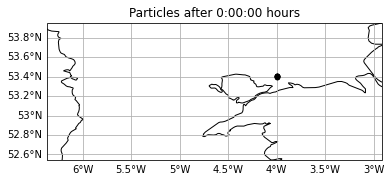

In [13]:
data_path = r'\data' 

ufiles = sorted(glob(data_path+'\*_grid_U.nc'))
vfiles = sorted(glob(data_path+'\*_grid_V.nc'))
wfiles = sorted(glob(data_path+'\*_grid_W.nc'))
mesh_mask = data_path + '\coordinates.nc'

filenames = {'U': {'lon': mesh_mask, 'lat': mesh_mask, 'data': ufiles},
             'V': {'lon': mesh_mask, 'lat': mesh_mask, 'data': vfiles},
             'W': {'lon': mesh_mask, 'lat': mesh_mask, 'data': wfiles}}

variables = {'U': 'vozocrtx',
             'V': 'vomecrty',
             'W': 'vomecrtz'}

dimensions = {'U': {'lon': 'glamf', 'lat': 'gphif', 'time': 'time_counter'},
              'V': {'lon': 'glamf', 'lat': 'gphif', 'time': 'time_counter'},
              'W': {'lon': 'glamf', 'lat': 'gphif', 'time': 'time_counter'}}

fieldset = FieldSet.from_nemo(filenames, variables, dimensions,allow_time_extrapolation=True)

npart = 10  # number of particles to be released
lon = -4 * np.ones(npart)
lat = np.linspace(53.4, 53.41, npart, dtype=np.float32)
repeatdt = delta(hours=2)  # release from the same set of locations every 3 hours

pset = ParticleSet(fieldset=fieldset, pclass=JITParticle, lon=lon, lat=lat, repeatdt=repeatdt)
pset.show()

C:\Users\nkj19blc\Anaconda3\envs\parcelsenv\lib\site-packages\numpy\lib\arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)
Exception ignored in: <function ParticleFileSOA.__del__ at 0x0000017B05C85160>
Traceback (most recent call last):
  File "C:\Users\nkj19blc\Anaconda3\envs\parcelsenv\lib\site-packages\parcels\particlefile\particlefilesoa.py", line 40, in __del__
    super(ParticleFileSOA, self).__del__()
  File "C:\Users\nkj19blc\Anaconda3\envs\parcelsenv\lib\site-packages\parcels\particlefile\baseparticlefile.py", line 235, in __del__
    self.close()
  File "C:\Users\nkj19blc\Anaconda3\envs\parcelsenv\lib\site-packages\parcels\particlefile\baseparticlefile.py", line 240, in close
    self.export()
  File "C:\Users\nkj19blc\A

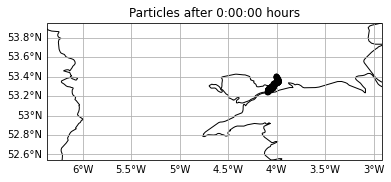

In [14]:
pset.execute(AdvectionRK4,
             dt=-timedelta(minutes=5),      
             runtime=timedelta(days=6))

pset.show(domain='N':53.6,'S':53,'E':-3.5,'W':-4.5}) 